<a href="https://colab.research.google.com/github/sinhah935/411-hw/blob/main/ConsesusDataMAss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Link to the dataset: https://data.census.gov/table/ACSDT5Y2023.B19013?q=B19013:%20Median%20Household%20Income%20in%20the%20Past%2012%20Months%20(in%202023%20Inflation-Adjusted%20Dollars)&g=040XX00US25$8600000

##Mount drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import folium
import geopandas as gpd
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
!pip install pdfplumber
import pdfplumber

In [ ]:


# Path to your CSV files (modify if needed)
csv_files = glob.glob("/content/drive/MyDrive/XC473/CensusDataMAss/*.csv")  # Finds all CSV files in the directory

# List to store DataFrames
dataframes = {}

# Read each CSV and store in the list
for file in csv_files:
    #read the csv file
    fileName = str(file)
    df = pd.read_csv(file)
    df = df.drop(columns=["Unnamed: 4"])

    #Rename the zipcode column and median_income
    df = df.rename(columns={"NAME": "zipcode", "B19013_001E": "median_income"})


    #ISolate the just the zipcode from the block of string

    df["zipcode"] = df["zipcode"].str.replace("ZCTA5 ", "").astype(str)
    fileName = fileName.replace("ACSDT5Y", "").replace(".B19013-Data.csv", "").replace("/content/drive/MyDrive/XC473/CensusDataMAss/", "")
    year = fileName


    #Convert the strings to int values
    df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
    df = df.dropna(subset=['zipcode', 'median_income'])

    df = df[["zipcode","median_income"]]

    df.columns = df.columns.str.strip()

    dataframes[year] = df

# Now, dataframes[0], dataframes[1], etc., contain individual CSV data

top10List = []
lowest10List = []

# for i in range(2011, 2024):
#   i = str(i)
#   top10List.append(dataframes[i].nlargest(5, 'median_income'))
#   lowest10List.append(dataframes[i].nsmallest(5, 'median_income'))




In [ ]:
# display(top10List[0])
display(dataframes['2011'].nlargest(5, 'median_income'))
display(dataframes['2011'].nsmallest(5, 'median_income'))

,zipcode,median_income
430,02468,201065.0
310,02030,184646.0
438,02493,180815.0
435,02481,171750.0
154,01467,162981.0


,zipcode,median_income
59,01094,16063.0
211,01608,17467.0
255,01840,17828.0
66,01105,18064.0
68,01107,18326.0


In [ ]:
import pandas as pd

for i in range(2011, 2024):
    i = str(i)

    # Example: Analyze a specific year
    df = dataframes[i]

    # Sort and select top 5 zip codes
    top_zipcodes = df.sort_values(by="median_income", ascending=False).head(5)

    # Plot
    plt.bar(top_zipcodes["zipcode"], top_zipcodes["median_income"])
    plt.xlabel("Zipcode")
    plt.ylabel("Median Income")
    plt.title(f"Top Zip Codes by Median Income in {i}")
    plt.show()





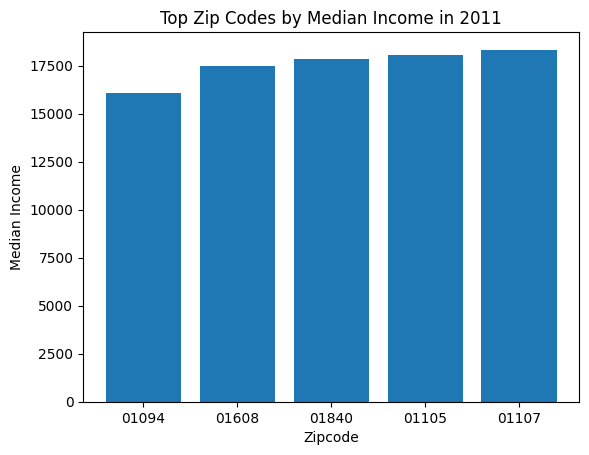

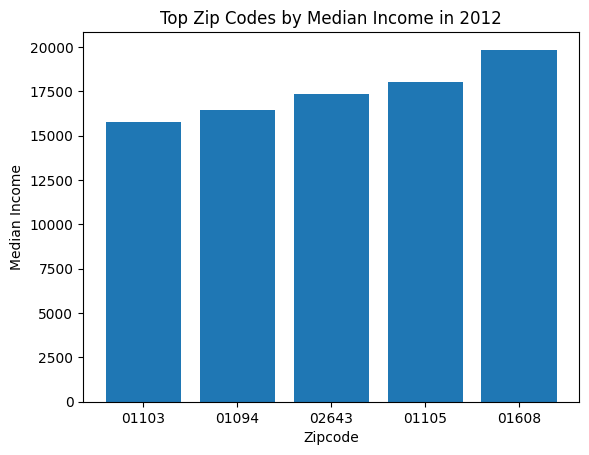

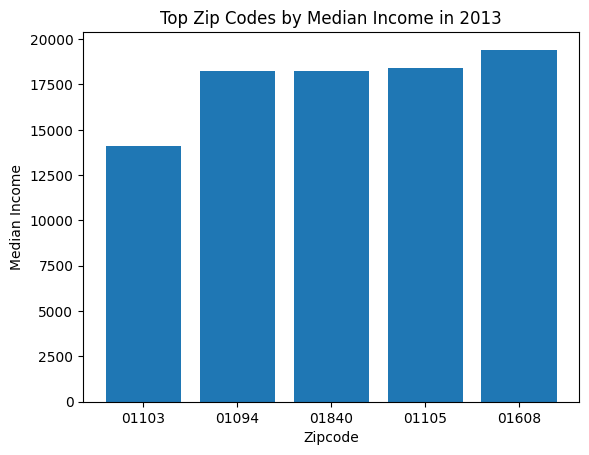

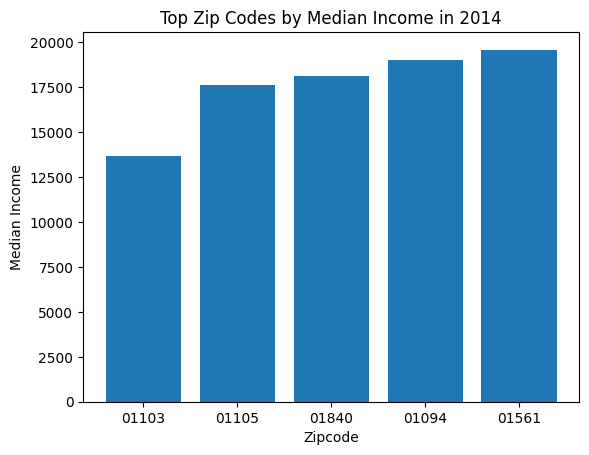

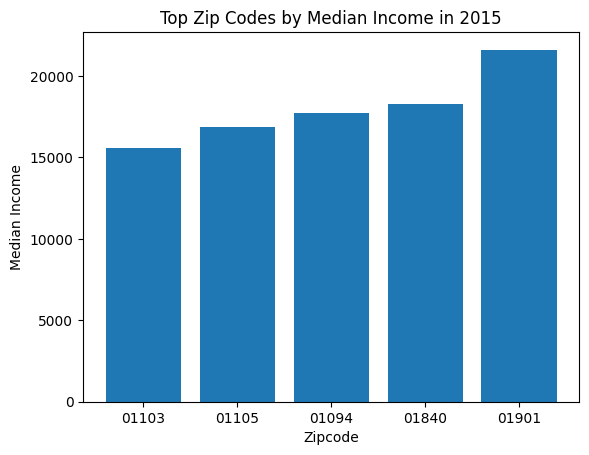

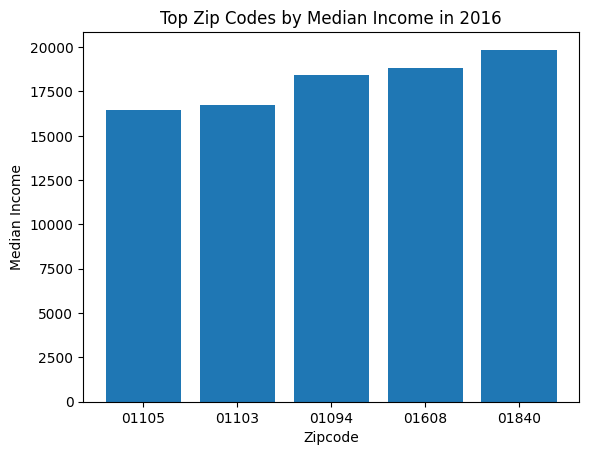

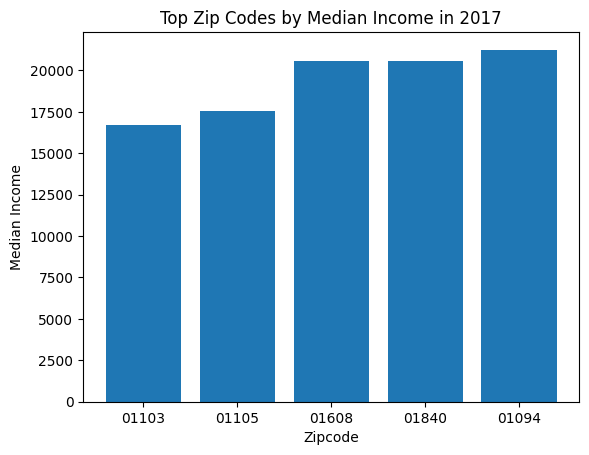

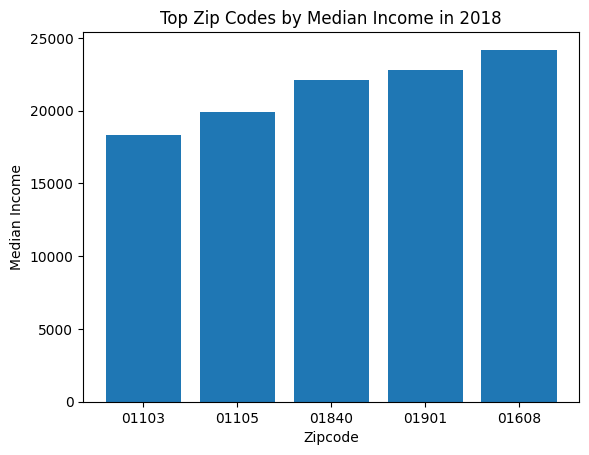

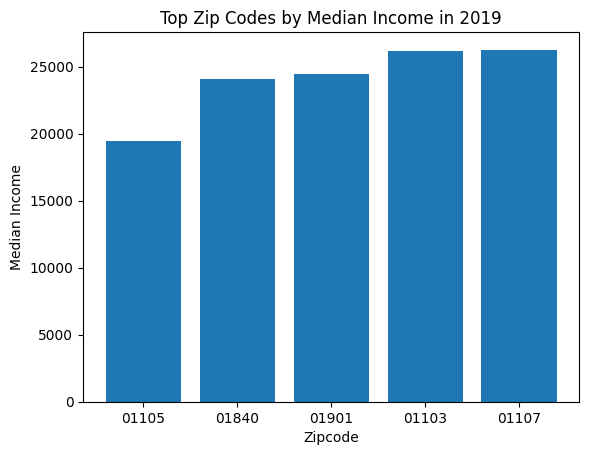

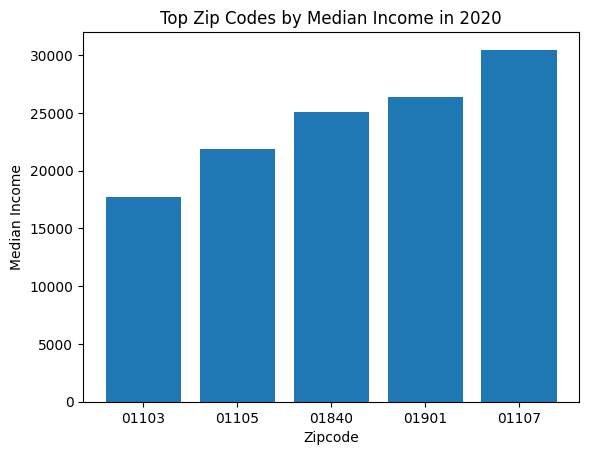

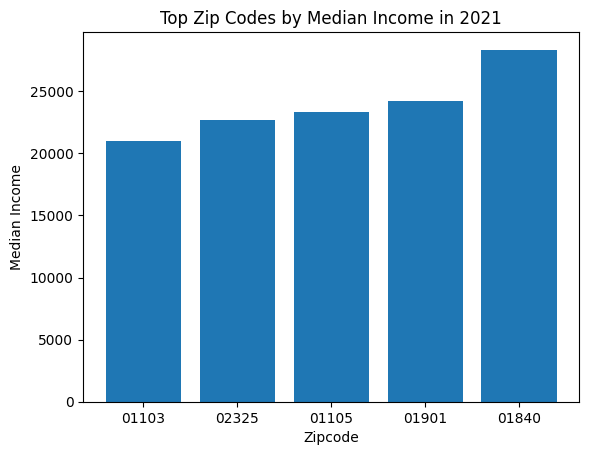

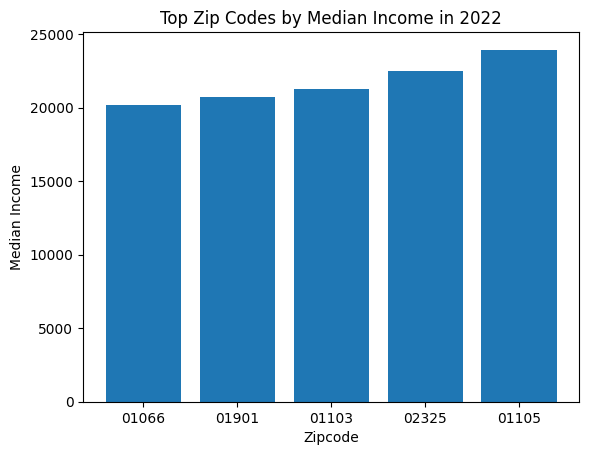

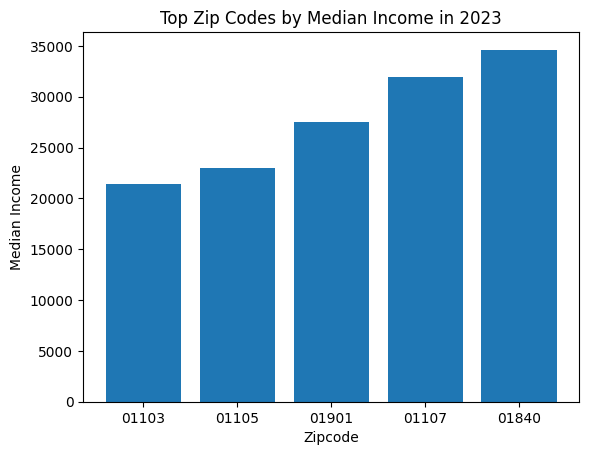

In [ ]:
##LOWEST INCOME ZIPCODES
for i in range(2011, 2024):
    i = str(i)

    # Example: Analyze a specific year
    df = dataframes[i]

    # Sort and select least 5 zip codes
    leastZipcodes = df.nsmallest(5, 'median_income')

    # Plot
    plt.bar(leastZipcodes["zipcode"], leastZipcodes["median_income"])
    plt.xlabel("Zipcode")
    plt.ylabel("Median Income")
    plt.title(f"Top Zip Codes by Median Income in {i}")
    plt.show()


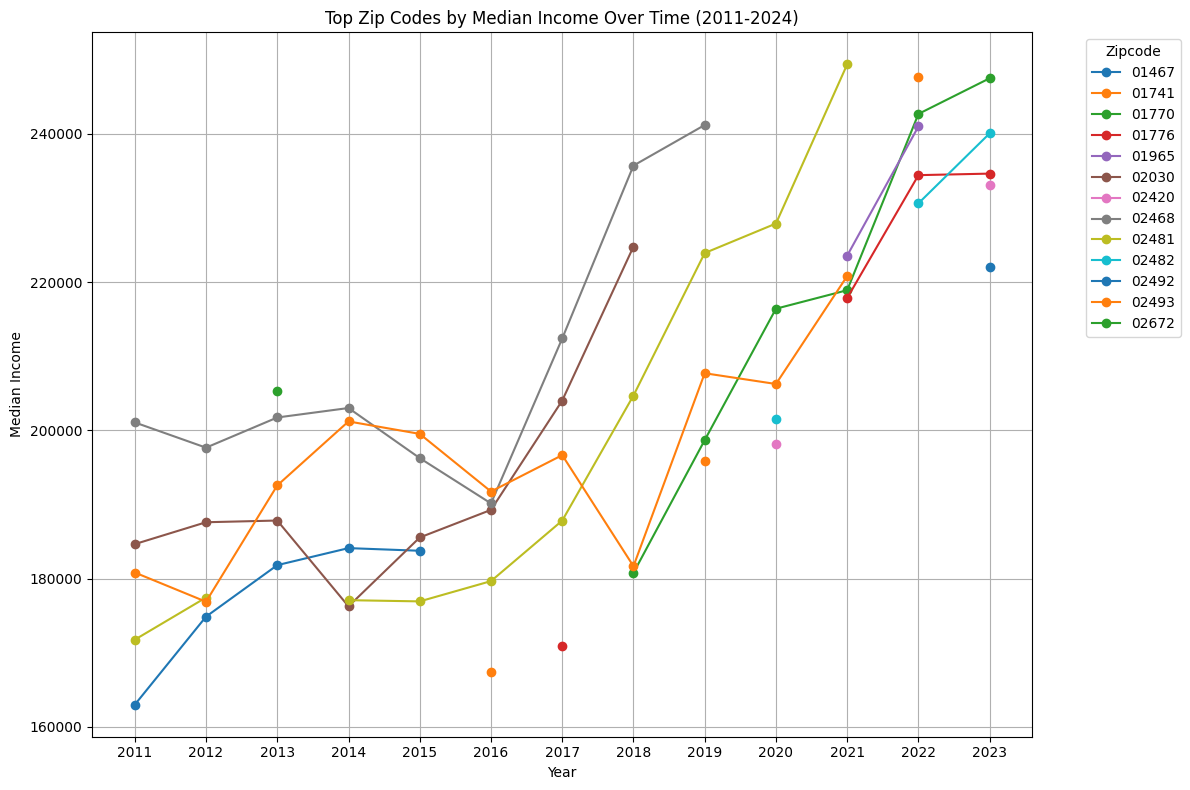

In [ ]:
##TIME SERIES OF TOP 10 ZIPCODES WITH HIGH INCOME OVER 2011-2024

# Initialize a dictionary to store top zip codes and their median incomes over time
top_zipcodes_over_time = {}

# Iterate through each year
for year in range(2011, 2024):
    year = str(year)
    df = dataframes[year]

    # Sort and select top 5 zip codes for the current year
    top_zipcodes = df.sort_values(by="median_income", ascending=False).head(5)

    # Store the top zip codes and their median incomes
    for _, row in top_zipcodes.iterrows():
        zipcode = row["zipcode"]
        median_income = row["median_income"]
        if zipcode not in top_zipcodes_over_time:
            top_zipcodes_over_time[zipcode] = {}
        top_zipcodes_over_time[zipcode][year] = median_income

# Convert the dictionary to a DataFrame for easier plotting
plot_data = []
for zipcode, incomes in top_zipcodes_over_time.items():
    for year, income in incomes.items():
        plot_data.append({"Zipcode": zipcode, "Year": year, "Median Income": income})
plot_df = pd.DataFrame(plot_data)

# Pivot the DataFrame for plotting
pivot_df = plot_df.pivot(index="Year", columns="Zipcode", values="Median Income")

# Plot the time series
plt.figure(figsize=(12, 8))
for zipcode in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[zipcode], marker='o', label=zipcode)

plt.xlabel("Year")
plt.ylabel("Median Income")
plt.title("Top Zip Codes by Median Income Over Time (2011-2024)")
plt.legend(title="Zipcode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

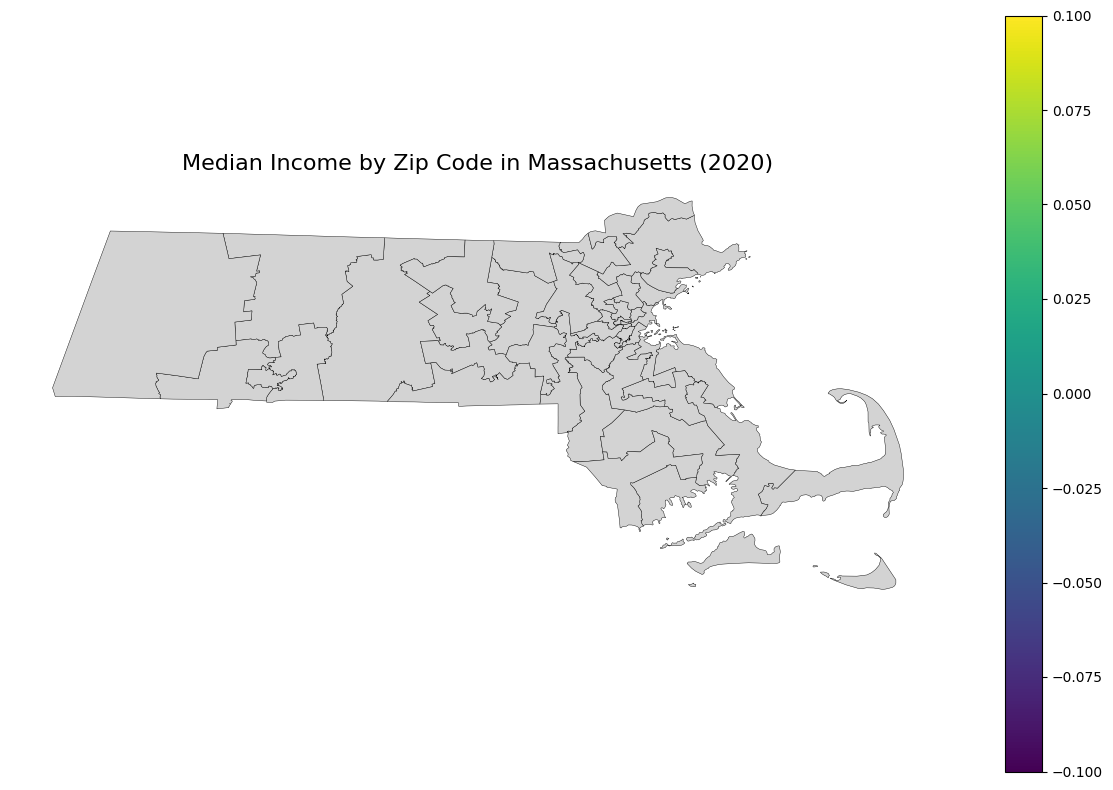

In [ ]:

# Load a shapefile of Massachusetts zip codes (you can find this online)
# Example: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the Massachusetts zip code shapefile
gdf = gpd.read_file("/content/drive/MyDrive/XC473/MassShape/MassShp2018.shp")

# Ensure the zip code column in the shapefile matches your data
# For example, if the zip code column in the shapefile is named "ZCTA5CE10":
gdf["zipcode"] = gdf["geometry"].astype(str)  # Convert to string to match your data

# Example: Use data from a specific year (e.g., 2020)
year = "2020"
df = dataframes[year]

# Ensure median_income is numeric
df["median_income"] = pd.to_numeric(df["median_income"], errors="coerce")

# Drop rows with missing median_income values
df = df.dropna(subset=["median_income"])

# Merge the shapefile with your median income data
merged = gdf.merge(df, on="zipcode", how="left")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create the choropleth map
merged.plot(column="median_income",  # Column to determine color
            cmap="viridis",  # Color map (e.g., "viridis", "plasma", "Reds")
            legend=True,  # Show legend
            ax=ax,
            missing_kwds={"color": "lightgrey"},  # Color for zip codes with missing data
            edgecolor="black",  # Border color for zip codes
            linewidth=0.3)  # Border line width

# Add title and labels
ax.set_title(f"Median Income by Zip Code in Massachusetts ({year})", fontsize=16)
ax.set_axis_off()  # Hide axes for a cleaner look

# Show the map
plt.tight_layout()
plt.show()